In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import georges

In [2]:
data = pd.read_table("~/Downloads/output.txt", 
              skiprows=1, 
              delim_whitespace=True
             )
data.head()

,PDGID,E[GeV],x[m],y[m],Z[m],S[m],Xp[rad],Yp[rad],NEvent,Weight,ParentID,TrackID,Turn
0,2212,1.159452,-0.004742,0.002444,0.00001,0.00001,-0.049981,0.01932,0,1.0,0,1,0
1,2212,1.159452,-0.014352,0.006158,0.19200,0.19200,-0.049981,0.01932,0,1.0,0,1,0
2,2212,1.159452,-0.025864,0.010608,0.42200,0.42200,-0.049981,0.01932,0,1.0,0,1,0
3,2212,1.159452,-0.050365,0.020079,0.91150,0.91150,-0.049981,0.01932,0,1.0,0,1,0
4,2212,1.159452,-0.065231,0.025825,1.20850,1.20850,-0.049981,0.01932,0,1.0,0,1,0


In [11]:
# PHASE_SPACE_DIMENSIONS = ['X', 'PX', 'Y', 'PY', 'DPP', 'DT']

def create_distribution_from_group(g):
    tmp = georges.Beam(np.transpose(np.array(
        [
            g['x[m]'].values, 
            g['Xp[rad]'].values,
            g['y[m]'].values,
            g['Yp[rad]'].values,
            g['E[GeV]'].values,
            g['E[GeV]'].values,
        ],
    )))
    return tmp

r = data.groupby(by='S[m]').apply(create_distribution_from_group)
r.name='BEAM'
tmp = pd.DataFrame(r)
#tmp = data.join(r, on='S[m]', how='inner')

In [12]:
tmp.shape

(32, 1)

In [13]:
type(tmp)

pandas.core.frame.DataFrame

In [26]:
tmp.name = 'TEST_BEAMLINE'
bl = georges.Beamline(tmp, with_expansion=False)
bl.line['AT_CENTER'] = bl.line.index
bl.line['S'] = bl.line.index
bl.line['PHYSICAL'] = True

(-200, 200)

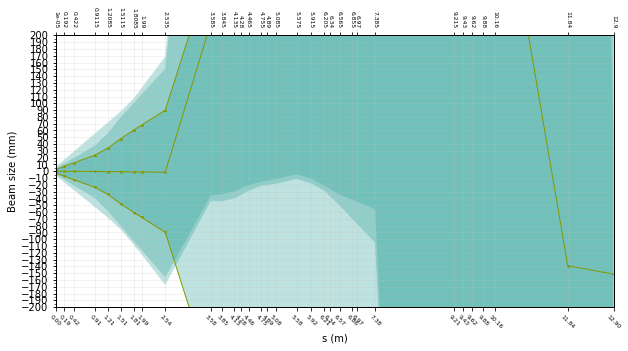

In [31]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
georges.plotting.prepare(ax, bl)
georges.plotting.tracking(ax, bl, plane='X', palette='Y_G4BL')
ax.set_ylim([-200, 200])

In [ ]:
bl.line['BEAM'].apply(lambda x: x.halo['20%'])

In [7]:
bl.line['BEAM'].iloc[0:100].apply(lambda x: x.halo)

0                1%        5%       20%       80%   ...
1                1%        5%       20%       80%   ...
2                1%        5%       20%       80%   ...
3                1%        5%       20%       80%   ...
4                1%        5%       20%       80%   ...
5                1%        5%       20%       80%   ...
6                1%        5%       20%       80%   ...
7                1%        5%       20%       80%   ...
8                1%        5%       20%       80%   ...
9                1%        5%       20%       80%   ...
10               1%        5%       20%       80%   ...
11               1%        5%       20%       80%   ...
12               1%        5%       20%       80%   ...
13               1%        5%       20%       80%   ...
14               1%        5%       20%       80%   ...
15               1%        5%       20%       80%   ...
16               1%        5%       20%       80%   ...
17               1%        5%       20%       80

In [6]:
bl.line

,PDGID,E[GeV],x[m],y[m],Z[m],S[m],Xp[rad],Yp[rad],NEvent,Weight,ParentID,TrackID,Turn,BEAM,AT_CENTER
0,2212,1.159452,-0.004742,0.002444,0.000010,0.00001,-0.049981,0.019320,0,1.0,0,1,0,<georges.beam.Beam object at 0x106c17c88>,0.00001
1,2212,1.159452,-0.014352,0.006158,0.192000,0.19200,-0.049981,0.019320,0,1.0,0,1,0,<georges.beam.Beam object at 0x106c17d68>,0.19200
2,2212,1.159452,-0.025864,0.010608,0.422000,0.42200,-0.049981,0.019320,0,1.0,0,1,0,<georges.beam.Beam object at 0x106c17e48>,0.42200
3,2212,1.159452,-0.050365,0.020079,0.911500,0.91150,-0.049981,0.019320,0,1.0,0,1,0,<georges.beam.Beam object at 0x106c17f28>,0.91150
4,2212,1.159452,-0.065231,0.025825,1.208500,1.20850,-0.049981,0.019320,0,1.0,0,1,0,<georges.beam.Beam object at 0x106c17fd0>,1.20850
5,2212,1.159452,-0.080397,0.031687,1.511500,1.51150,-0.049981,0.019320,0,1.0,0,1,0,<georges.beam.Beam object at 0x106c27128>,1.51150
6,2212,1.159452,-0.095263,0.037434,1.808500,1.80850,-0.049981,0.019320,0,1.0,0,1,0,<georges.beam.Beam object at 0x106c27208>,1.80850
7,2212,1.159452,-0.104348,0.040945,1.990000,1.99000,-0.049981,0.019320,0,1.0,0,1,0,<georges.beam.Beam object at 0x106c272e8>,1.99000
8,2212,1.159452,-0.131627,0.051490,2.535000,2.53500,-0.049981,0.019320,0,1.0,0,1,0,<georges.beam.Beam object at 0x106c273c8>,2.53500
9,2212,1.159452,0.215300,0.072872,3.640154,3.58500,0.603576,0.019320,0,1.0,0,1,0,<georges.beam.Beam object at 0x106c274a8>,3.58500
